# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city= "silver city"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=9e2cd2e815c85d466b590c3f9517a4a1&units=metric&q=silver city'

In [84]:
results=requests.get(query_url).json()
results

{'coord': {'lon': -108.28, 'lat': 32.77},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 12.79,
  'feels_like': 4.51,
  'temp_min': 11.11,
  'temp_max': 14.44,
  'pressure': 1011,
  'humidity': 30},
 'visibility': 16093,
 'wind': {'speed': 8.2, 'deg': 270, 'gust': 11.8},
 'clouds': {'all': 1},
 'dt': 1586651057,
 'sys': {'type': 1,
  'id': 5940,
  'country': 'US',
  'sunrise': 1586609245,
  'sunset': 1586655607},
 'timezone': -21600,
 'id': 5491487,
 'name': 'Silver City',
 'cod': 200}

In [85]:

# set up lists to hold reponse info
lat = []
long = []
max_temp = []
humidity = []
wind = []
clouds = []
country = []
date = []
city_name = []

# Loop through the list of cities and perform a request for data on each
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for i,city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)

        print("Processing record " + str(i) + "|" + city)

    except:
        print("city not found")
    
    

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {max_temp}") 

Processing record 0|upernavik
Processing record 1|san quintin
Processing record 2|butaritari
Processing record 3|tuktoyaktuk
Processing record 4|port elizabeth
Processing record 5|ushuaia
Processing record 6|tilichiki
Processing record 7|barrow
Processing record 8|hermanus
Processing record 9|severo-kurilsk
Processing record 10|los llanos de aridane
Processing record 11|bethel
Processing record 12|taltal
Processing record 13|albany
Processing record 14|vaini
Processing record 15|puerto ayora
Processing record 16|magadan
Processing record 17|saint-georges
Processing record 18|todos santos
Processing record 19|rikitea
city not found
Processing record 21|new norfolk
city not found
Processing record 23|port alfred
Processing record 24|busselton
Processing record 25|saint george
Processing record 26|provideniya
Processing record 27|atuona
Processing record 28|faya
Processing record 29|thompson
Processing record 30|bluff
Processing record 31|ancud
Processing record 32|mar del plata
Processin

Processing record 276|saint albans
Processing record 277|kavaratti
Processing record 278|tual
Processing record 279|scarborough
Processing record 280|penal
city not found
Processing record 282|sabang
Processing record 283|vao
Processing record 284|zhezkazgan
Processing record 285|sambava
Processing record 286|bonfim
Processing record 287|deputatskiy
Processing record 288|vanavara
Processing record 289|tanout
Processing record 290|cockburn town
Processing record 291|arraial do cabo
Processing record 292|huilong
Processing record 293|marienburg
Processing record 294|hilton head island
Processing record 295|korla
city not found
Processing record 297|bathsheba
Processing record 298|anchorage
Processing record 299|ostrovnoy
Processing record 300|adrar
Processing record 301|elbistan
city not found
Processing record 303|torquay
Processing record 304|cabedelo
Processing record 305|opuwo
Processing record 306|longkou
Processing record 307|burns lake
Processing record 308|ottawa
Processing recor

Processing record 551|butte
city not found
city not found
Processing record 554|conde
Processing record 555|udachnyy
Processing record 556|asnaes
city not found
Processing record 558|rocha
Processing record 559|pogar
Processing record 560|moose factory
Processing record 561|bengkulu
Processing record 562|chany
Processing record 563|shirokiy
Processing record 564|telde
Processing record 565|stupava
city not found
Processing record 567|kostomuksha
city not found
Processing record 569|bereznik
Processing record 570|healdsburg
Processing record 571|tazovskiy
Processing record 572|inhuma
city not found
Processing record 574|chunhuhub
city not found
Processing record 576|umm kaddadah
city not found
Processing record 578|eskisehir
Processing record 579|tonekabon
Processing record 580|nandgaon
Processing record 581|sibu
Processing record 582|skagen
Processing record 583|bubaque
Processing record 584|meadow lake
Processing record 585|buarcos
Processing record 586|muros
Processing record 587|ter

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
weather_df=pd.DataFrame({
    "city": city_name,
    "cloudiness":clouds,
    "country": country, 
    "date":date,
    "humidity":humidity, 
    "latitude":lat, 
    "longitude":long, 
    "temperature":max_temp, 
    "wind": wind
})

weather_df



city  cloudiness country        date  humidity  latitude  \
0         upernavik         100      GL  1586650763        88     72.79   
1       san quintin          17      MX  1586650758        73     30.48   
2        butaritari          88      KI  1586650641        74      3.07   
3       tuktoyaktuk          20      CA  1586650683        84     69.45   
4    port elizabeth          92      ZA  1586650824        49    -33.92   
..              ...         ...     ...         ...       ...       ...   
535         bubaque           8      GW  1586651117        79     11.28   
536     meadow lake           1      US  1586651117        10     34.80   
537         buarcos          75      PT  1586651117        93     40.17   
538           muros          90      ES  1586651117        93     42.78   
539     terrace bay          56      CA  1586651117        72     48.78   

     longitude  temperature   wind  
0       -56.15        -7.03   0.78  
1      -115.95        16.44   7.83  
2       172.79        28.91   4.63  
3      -133.04       -14.00   5.10  
4        25.57        20.00   3.10  
..         ...          ...    ...  
535     -15.83        25.82   7.18  
536    -106.54        20.56  12.30  
537      -8.88        13.89   1.50  
538      -9.06        12.78   2.60  
539     -87.10         2.60   5.52  

[540 rows x 9 columns]

In [87]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Temperature vs. Latitude')

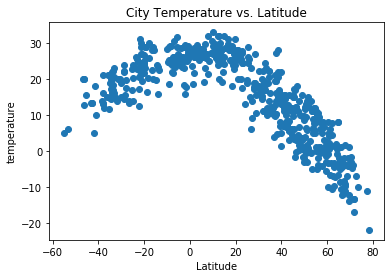

In [88]:
plt.scatter(weather_df["latitude"], weather_df["temperature"])

plt.xlabel("Latitude")
plt.ylabel("temperature")
plt.title("City Temperature vs. Latitude")

#The above code creates a scatter plot comparing the above cities latitudes (x axis values) with their temperatures (y axis values).
#The max temperature seems to be at it's highest for cities near the latitude 0.

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Humidity vs. Latitude')

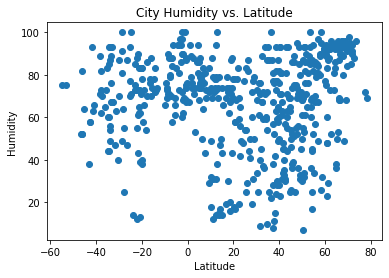

In [89]:
plt.scatter(weather_df["latitude"], weather_df["humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Humidity vs. Latitude")

#The above code creates a scatter plot comparing the above cities latitudes (x axis values) with their humidity (y axis values).
#The amount of humidity seems to be above 40 for most cities regardless of their latitudes. 

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Cloudiness vs. Latitude')

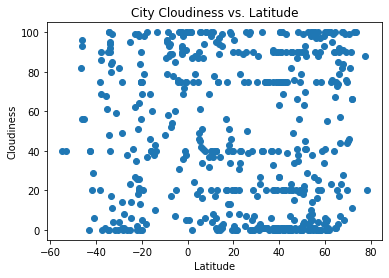

In [90]:
plt.scatter(weather_df["latitude"], weather_df["cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Cloudiness vs. Latitude")

#The above code creates a scatter plot comparing the above cities latitudes (x axis values) with their cloudiness (y axis values).
#There does not appear to be a correlation between latitude and cloudiness for the selected cities meaning that regardless of latitude it could or could not be cloudy in any given city. 

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Wind Speed vs. Latitude')

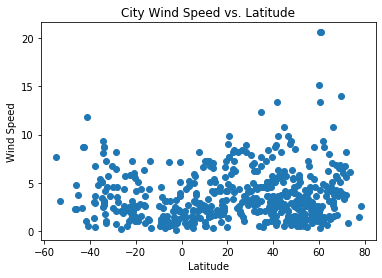

In [91]:
plt.scatter(weather_df["latitude"], weather_df["wind"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Wind Speed vs. Latitude")

#The above code creates a scatter plot comparing the above cities latitudes (x axis values) with their wind speed (y axis values).
#It appears that wind speed is lower for most of the selected cities regardless of latitude.

## Linear Regression

In [92]:
# OPTIONAL: Create a function to create Linear Regression plots


In [93]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere= weather_df.loc[(weather_df["latitude"] >= 0)]
Northern_hemisphere

nx_values=Northern_hemisphere["latitude"]
nx_values

Southern_hemisphere= weather_df.loc[(weather_df["latitude"] <= 0)]
Southern_hemisphere

sx_values=Southern_hemisphere["latitude"]
sx_values

4     -33.92
5     -54.80
8     -34.42
12    -25.40
14    -21.20
       ...  
509    -8.14
512    -7.26
515   -34.48
518    -3.80
527    -6.67
Name: latitude, Length: 150, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9028893472920598


Text(0, 0.5, 'Max Temperature')

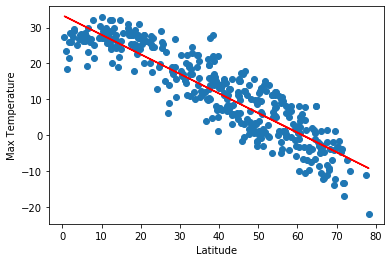

In [94]:
plt.scatter(nx_values, Northern_hemisphere["temperature"])

correlation = st.pearsonr(nx_values, Northern_hemisphere["temperature"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, Northern_hemisphere["temperature"])
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6984994221668911


Text(0, 0.5, 'Max Temperature')

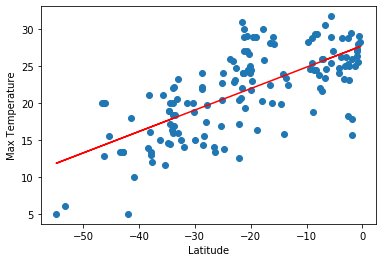

In [95]:
plt.scatter(sx_values, Southern_hemisphere["temperature"])

correlation = st.pearsonr(sx_values, Southern_hemisphere["temperature"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, Southern_hemisphere["temperature"])
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(sx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [ ]:
#ANALYSIS OF SOUTHERN VS NORTHERN HEMISPHERES: MAX TEMP VS LATITUDE
#The linear regression for the Northern Hemisphere is a negative correlation while the Southern Hemisphere has a positive correlation.
#For both plots it appears that the closer the cities' latitudes get to 0 the higher their max temperatures are.




####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22119889757212266


Text(0, 0.5, 'Humidity')

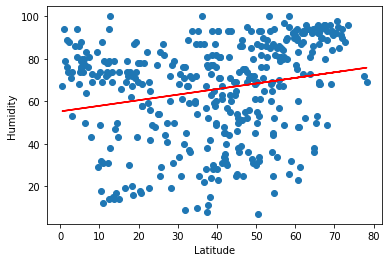

In [96]:
plt.scatter(nx_values, Northern_hemisphere["humidity"])

correlation = st.pearsonr(nx_values, Northern_hemisphere["humidity"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, Northern_hemisphere["humidity"])
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26707906404691945


Text(0, 0.5, 'Humidity')

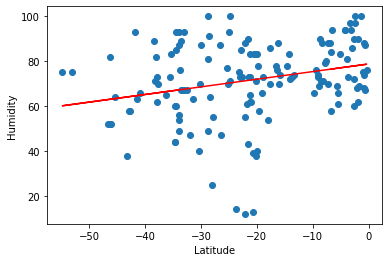

In [97]:
plt.scatter(sx_values, Southern_hemisphere["humidity"])

correlation = st.pearsonr(sx_values, Southern_hemisphere["humidity"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, Southern_hemisphere["humidity"])
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(sx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [ ]:
#ANALYSIS OF SOUTHERN VS NORTHERN HEMISPHERES: HUMIDITY VS LATITUDE
#The linear regressions for both the northern and southern hemispheres are similar in that they are both positive correlations.
#The humidity levels for cities seem to increase going from the lowest latitude (in the southern hemisphere) to the highest (in the northern hemisphere)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.046131092251317785


Text(0, 0.5, 'Cloudiness')

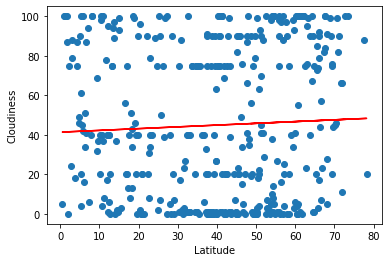

In [98]:
plt.scatter(nx_values, Northern_hemisphere["cloudiness"])

correlation = st.pearsonr(nx_values, Northern_hemisphere["cloudiness"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, Northern_hemisphere["cloudiness"])
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25643848532972013


Text(0, 0.5, 'Cloudiness')

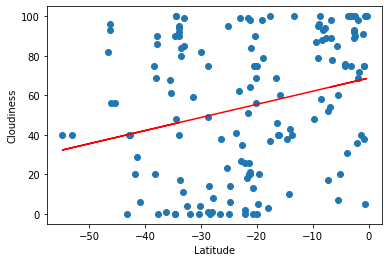

In [99]:
plt.scatter(sx_values, Southern_hemisphere["cloudiness"])

correlation = st.pearsonr(sx_values, Southern_hemisphere["cloudiness"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, Southern_hemisphere["cloudiness"])
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(sx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [ ]:
#ANALYSIS OF SOUTHERN VS NORTHERN HEMISPHERES: CLOUDINESS VS LATITUDE
#The linear regression for the Norther Hemisphere has nearly a horizontal line while the southern hemisphere has a more positive correlation.
#Overall There is less of a correlation between cloudiness and latitude in both the northern and southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07763715617554309


Text(0, 0.5, 'Wind Speed')

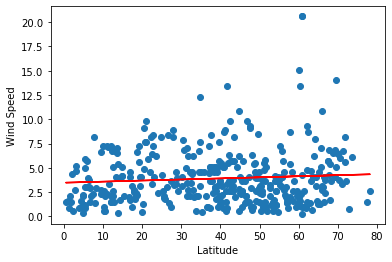

In [100]:
plt.scatter(nx_values, Northern_hemisphere["wind"])

correlation = st.pearsonr(nx_values, Northern_hemisphere["wind"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, Northern_hemisphere["wind"])
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.37792952604873453


Text(0, 0.5, 'Wind Speed')

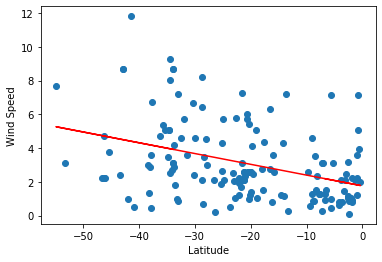

In [101]:
plt.scatter(sx_values, Southern_hemisphere["wind"])

correlation = st.pearsonr(sx_values, Southern_hemisphere["wind"])
print(f"The r-squared is: {(correlation[0])}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, Southern_hemisphere["wind"])
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(sx_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [ ]:
#ANALYSIS OF SOUTHERN VS NORTHERN HEMISPHERES: WIND SPEED VS LATITUDE
#The linear regression for the Northern Hemisphere appears to be an almost horizontal line while the southern hemisphere is showing more of a negative correlation.
#Wind Speed does not seem to be affected much by latitude in the northern hemisphere but the closer you get to 0 in the southern hemisphere the lower the wind speed.